https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Regression.ipynb

Last updated: 15 Feb 2023

# PyCaret Regression Tutorial: freMTPL2freq

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.

## Installation

PyCaret is tested and supported on the following 64-bit systems:

- Python 3.7 – 3.10

- Python 3.9 for Ubuntu only

- Ubuntu 16.04 or later

- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`

- `pip install pycaret[models]`

- `pip install pycaret[tuner]`

- `pip install pycaret[mlops]`

- `pip install pycaret[parallel]`

- `pip install pycaret[test]`

(Installed in Terminal using)

```
> pip3 install --user pycaret[full]
```

(Tried this for `eda()` but it still didn't work)

```
> pip3 install --user autoviz
```

In [1]:
# check installed version (must be >3.0)
import pycaret

pycaret.__version__

'3.0.1'

## Quick start

PyCaret's Regression Module is a supervised machine learning module that is used for estimating the relationships between a dependent variable (often called the outcome variable, or target) and one or more independent variables (often called features, predictors, or covariates). 

The objective of regression is to predict continuous values such as predicting sales amount, predicting quantity, predicting temperature, etc. Regression module provides several pre-processing features to preprocess the data for modeling through the setup function. 

PyCaret's regression module has many preprocessing capabilities and it coems with over 25 ready-to-use algorithms and several plots to analyze the performance of trained models. 

A typical workflow in PyCaret Regression module consist of the following 5 steps in this order:

1. **Setup** 

2. **Compare Models**

3. **Analyze Model**

4. **Prediction**

5. **Save Model**

In [2]:
# load sample dataset from pycaret dataset module

from pycaret.datasets import get_data
import pandas as pd

# data = get_data('insurance')
train_data = pd.read_csv("freMTPL2freq_dataset_train.csv")
test_data = pd.read_csv("freMTPL2freq_dataset_test.csv")

# remove "IDpol" (should not be a predictor)
train_data = train_data.drop(["IDpol"], axis=1)
test_data = test_data.drop(["IDpol"], axis=1)

train_data.head()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Area,Density,Region
0,3,0,0.77,5,0,55,50,B12,Regular,D,1217,Rhone-Alpes
1,5,0,0.75,6,2,52,50,B12,Diesel,B,54,Picardie
2,11,0,0.84,7,0,46,50,B12,Diesel,B,76,Aquitaine
3,13,0,0.52,6,2,38,50,B12,Regular,E,3003,Nord-Pas-de-Calais
4,15,0,0.45,6,2,38,50,B12,Regular,E,3003,Nord-Pas-de-Calais


## Setup

The `setup` function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [3]:
%%time

# import pycaret regression and init setup
from pycaret.regression import *

# s = setup(data, target='charges', session_id=123)
s = setup(train_data, target='ClaimNb', session_id=123)

,Description,Value
0,Session id,123
1,Target,ClaimNb
2,Target type,Regression
3,Original data shape,"(474765, 12)"
4,Transformed data shape,"(474765, 48)"
5,Transformed train set shape,"(332335, 48)"
6,Transformed test set shape,"(142430, 48)"
7,Ordinal features,1
8,Numeric features,7
9,Categorical features,4


Once the setup has been successfully executed it shows the information grid containing experiment level information. 

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility
    + If no `session_id` is passed, a random number is automatically generated that is distributed to all functions

- **Target type:**  Binary, Multiclass, or Regression
    + The Target type is automatically detected

- **Original data shape:**  Shape of the original data prior to any transformations

- **Transformed train set shape:**  Shape of transformed train set

- **Transformed test set shape:**  Shape of transformed test set

- **Numeric features:**  The number of features considered as numerical

- **Categorical features:**  The number of features considered as categorical

PyCaret has two set of API's that you can work with:

1. Functional (as seen above)

2. Object Oriented API

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [1]:
# import RegressionExperiment and init the class

from pycaret.regression import RegressionExperiment

exp = RegressionExperiment()

In [5]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [6]:
%%time

# init setup on exp
# exp.setup(data, target='charges', session_id=123)
exp.setup(train_data, target='ClaimNb', session_id=123)

,Description,Value
0,Session id,123
1,Target,ClaimNb
2,Target type,Regression
3,Original data shape,"(474765, 12)"
4,Transformed data shape,"(474765, 48)"
5,Transformed train set shape,"(332335, 48)"
6,Transformed test set shape,"(142430, 48)"
7,Ordinal features,1
8,Numeric features,7
9,Categorical features,4


You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.

## Compare Models

The `compare_models` function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [7]:
%%time

# compare baseline models
best = compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.0605,0.0430,0.2074,-0.0159,0.1371,0.9804,0.2400
lightgbm,Light Gradient Boosting Machine,0.0717,0.0408,0.2018,0.0373,0.1339,0.9253,0.9610
catboost,CatBoost Regressor,0.0719,0.0408,0.2019,0.0364,0.1342,0.9215,4.0550
xgboost,Extreme Gradient Boosting,0.0722,0.0412,0.2029,0.0273,0.1352,0.9215,6.6510
gbr,Gradient Boosting Regressor,0.0724,0.0410,0.2024,0.0316,0.1342,0.9332,6.7940
knn,K Neighbors Regressor,0.0729,0.0500,0.2235,-0.1803,0.1562,0.9511,5.9350
omp,Orthogonal Matching Pursuit,0.0740,0.0421,0.2050,0.0067,0.1359,0.9557,0.4920
ridge,Ridge Regression,0.0741,0.0417,0.2041,0.0161,0.1354,0.9456,0.6210
br,Bayesian Ridge,0.0741,0.0417,0.2041,0.0161,0.1354,0.9458,0.3260
lr,Linear Regression,0.0741,0.0417,0.2041,0.0161,0.1354,0.9456,1.1270


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [8]:
%%time

# compare models using OOP
exp.compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.0605,0.0430,0.2074,-0.0159,0.1371,0.9804,0.1010
lightgbm,Light Gradient Boosting Machine,0.0717,0.0408,0.2018,0.0373,0.1339,0.9253,0.2530
catboost,CatBoost Regressor,0.0719,0.0408,0.2019,0.0364,0.1342,0.9215,0.1800
xgboost,Extreme Gradient Boosting,0.0722,0.0412,0.2029,0.0273,0.1352,0.9215,0.2160
gbr,Gradient Boosting Regressor,0.0724,0.0410,0.2024,0.0316,0.1342,0.9332,0.1330
knn,K Neighbors Regressor,0.0729,0.0500,0.2235,-0.1803,0.1562,0.9511,5.8260
omp,Orthogonal Matching Pursuit,0.0740,0.0421,0.2050,0.0067,0.1359,0.9557,0.1020
ridge,Ridge Regression,0.0741,0.0417,0.2041,0.0161,0.1354,0.9456,0.4960
br,Bayesian Ridge,0.0741,0.0417,0.2041,0.0161,0.1354,0.9458,0.0990
lr,Linear Regression,0.0741,0.0417,0.2041,0.0161,0.1354,0.9456,0.1160


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

HuberRegressor()

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only.

## Analyze Model

The `plot_model` function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

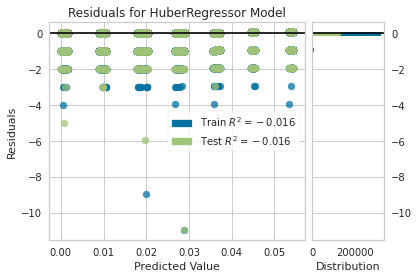

In [9]:
# plot residuals
plot_model(best, plot='residuals')

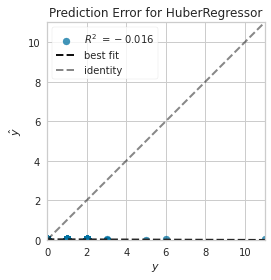

In [10]:
# plot error
plot_model(best, plot='error')

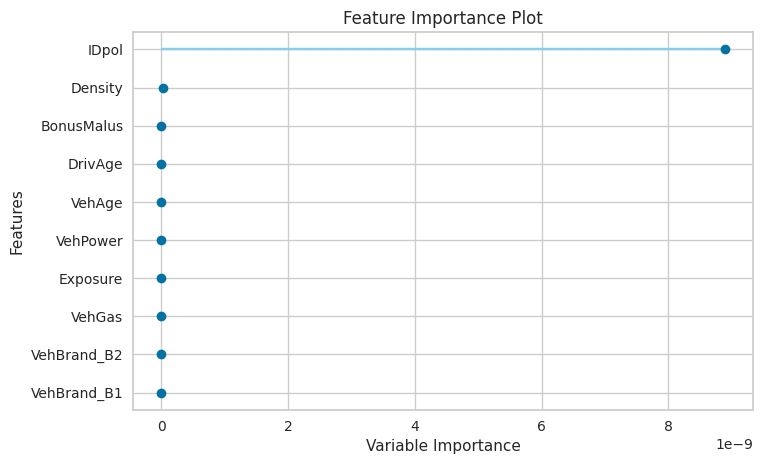

In [11]:
# plot feature importance
plot_model(best, plot='feature')

In [12]:
# check docstring to see available plots 
help(plot_model)

Help on function plot_model in module pycaret.regression.functional:

plot_model(estimator, plot: str = 'residuals', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, use_train_data: bool = False, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    
    Example
    --------
    >>> from pycaret.datasets import get_data
    >>> boston = get_data('boston')
    >>> from pycaret.regression import *
    >>> exp_name = setup(data = boston,  target = 'medv')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'residual')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'residual'
        List of available p

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses `ipywidget`.

In [13]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

___

## Prediction

The `predict_model` function returns `prediction_label` as new column to the input dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [14]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,0.0602,0.0426,0.2063,-0.0163,0.1365,0.9807


In [15]:
# show predictions df
holdout_pred.head()

,IDpol,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Area,Density,Region,ClaimNb,prediction_label
230081,2261673,0.080000,6,3,38,60,B5,Regular,D,645,Languedoc-Roussillon,0,0.020112
369544,4118829,0.005464,7,9,43,50,B1,Diesel,E,4116,Centre,0,0.036627
466743,6096028,0.370000,7,1,33,50,B12,Diesel,E,6485,Ile-de-France,0,0.054209
429675,5045666,0.070000,8,4,39,50,B12,Diesel,B,52,Limousin,0,0.044869
283377,3095010,1.000000,8,13,60,50,B4,Regular,D,1313,Centre,0,0.027522


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `charges`. We can then use the new data frame without labels for scoring.

In [16]:
# copy data and drop charges
# new_data = data.copy()
new_data = test_data.copy()
new_data.drop('ClaimNb', axis=1, inplace=True)
new_data.head()

,IDpol,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Area,Density,Region
0,1.0,0.10,5,0,55,50,B12,Regular,D,1217,Rhone-Alpes
1,10.0,0.09,7,0,46,50,B12,Diesel,B,76,Aquitaine
2,21.0,0.15,7,0,41,50,B12,Diesel,B,60,Pays-de-la-Loire
3,35.0,0.76,4,9,23,100,B6,Regular,E,7887,Nord-Pas-de-Calais
4,42.0,0.77,6,2,32,56,B12,Diesel,A,23,Centre


In [17]:
# predict model on new_data
predictions = predict_model(best, data=new_data)
predictions.head()

,IDpol,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Area,Density,Region,prediction_label
0,1.0,0.10,5,0,55,50,B12,Regular,D,1217,Rhone-Alpes,3.509482e-08
1,10.0,0.09,7,0,46,50,B12,Diesel,B,76,Aquitaine,9.061994e-08
2,21.0,0.15,7,0,41,50,B12,Diesel,B,60,Pays-de-la-Loire,1.880916e-07
3,35.0,0.76,4,9,23,100,B6,Regular,E,7887,Nord-Pas-de-Calais,4.807054e-07
4,42.0,0.77,6,2,32,56,B12,Diesel,A,23,Centre,3.740405e-07


___

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [18]:
# save pipeline
save_model(best, 'my_first_pipeline2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['IDpol', 'Exposure', 'VehPower',
                                              'VehAge', 'DrivAge', 'BonusMalus',
                                              'Density'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['VehBrand', 'VehGas', 'Area',
                                              'Region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),...
                                     transformer=OrdinalEncoder(cols=['VehGas'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'VehGas',
                                                                          'data_type': dty

In [19]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline2')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['IDpol', 'Exposure', 'VehPower',
                                             'VehAge', 'DrivAge', 'BonusMalus',
                                             'Density'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['VehBrand', 'VehGas', 'Area',
                                             'Region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),...
                                    transformer=OrdinalEncoder(cols=['VehGas'],
                                                               handle_missing='return_nan',
                                                               mapping=[{'col': 'VehGas',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': Diesel     0
Regular    1
NaN       -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['VehBrand', 'Area', 'Region'],
                                    transformer=OneHotEncoder(cols=['VehBrand',
                                                                    'Area',
                                                                    'Region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model', HuberRegressor())])

## Detailed function-by-function overview

### Setup

The `setup` function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

In [20]:
%%time

s = setup(train_data, target='ClaimNb', session_id=123)

,Description,Value
0,Session id,123
1,Target,ClaimNb
2,Target type,Regression
3,Original data shape,"(474765, 12)"
4,Transformed data shape,"(474765, 48)"
5,Transformed train set shape,"(332335, 48)"
6,Transformed test set shape,"(142430, 48)"
7,Ordinal features,1
8,Numeric features,7
9,Categorical features,4


To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [21]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [22]:
# lets access X_train_transformed
get_config('X_train_transformed')

,IDpol,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehBrand_B2,VehBrand_B12,VehBrand_B5,VehBrand_B4,...,Region_Aquitaine,Region_Lorraine,Region_Corse,Region_Basse-Normandie,Region_Picardie,Region_Champagne-Ardenne,Region_Haute-Normandie,Region_Bourgogne,Region_Alsace,Region_Franche-Comte
458812,6058796.0,0.53,6.0,4.0,47.0,76.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
452129,6020622.0,0.62,7.0,10.0,52.0,50.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304123,3154715.0,0.29,5.0,15.0,28.0,95.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121580,1166973.0,0.76,6.0,5.0,36.0,50.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4254,18537.0,1.00,6.0,8.0,77.0,50.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192476,2150773.0,0.83,7.0,6.0,24.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17730,53801.0,1.00,7.0,2.0,67.0,58.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28030,80637.0,0.13,6.0,10.0,26.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277869,3076432.0,1.00,5.0,5.0,80.0,50.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

The current seed is: 123


In [24]:
# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [25]:
help(setup)

Help on function setup in module pycaret.regression.functional:

setup(data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, data_func: Optional[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame]]] = None, target: Union[int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = -1, index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True, train_size: float = 0.7, test_data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, ordinal_features: Optional[Dict[str, list]] = None, numeric_features: Optional[List[str]] = None, categorical_features: Optional[List[str]] = None, date_features: Optional[List[str]] = None, text_features: Optional[List[str]] = None, ignore_features: Optional[List[str]] = None, keep_features: Optional[List[str]] = None, preproces

In [26]:
%%time

# init setup with `normalize=True`
s = setup(
    train_data, 
    target='ClaimNb', 
    session_id=123,
    normalize=True, 
    normalize_method='minmax'
)

,Description,Value
0,Session id,123
1,Target,ClaimNb
2,Target type,Regression
3,Original data shape,"(474765, 12)"
4,Transformed data shape,"(474765, 48)"
5,Transformed train set shape,"(332335, 48)"
6,Transformed test set shape,"(142430, 48)"
7,Ordinal features,1
8,Numeric features,7
9,Categorical features,4


<Axes: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


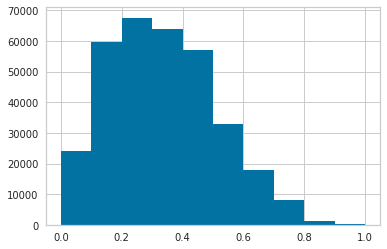

In [27]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['DrivAge'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

<Axes: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


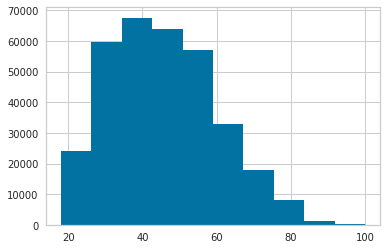

In [28]:
get_config('X_train')['DrivAge'].hist()

___

### Compare Models

The `compare_models` function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [29]:
%%time

best = compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.0387,0.0439,0.2093,-0.0354,0.1383,1.0000,1.9700
knn,K Neighbors Regressor,0.0709,0.0492,0.2218,-0.1630,0.1546,0.9476,5.8500
lightgbm,Light Gradient Boosting Machine,0.0717,0.0408,0.2019,0.0371,0.1340,0.9255,0.9610
catboost,CatBoost Regressor,0.0719,0.0408,0.2019,0.0364,0.1342,0.9216,4.0120
xgboost,Extreme Gradient Boosting,0.0722,0.0412,0.2029,0.0272,0.1352,0.9215,6.6110
gbr,Gradient Boosting Regressor,0.0724,0.0410,0.2024,0.0316,0.1342,0.9331,6.8970
omp,Orthogonal Matching Pursuit,0.0738,0.0419,0.2047,0.0098,0.1357,0.9521,0.5630
ridge,Ridge Regression,0.0741,0.0417,0.2041,0.0161,0.1354,0.9456,0.2870
br,Bayesian Ridge,0.0741,0.0417,0.2041,0.0161,0.1354,0.9458,0.3080
lr,Linear Regression,0.0741,0.0417,0.2041,0.0161,0.1354,0.9456,0.3920


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [30]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [31]:
%%time

compare_tree_models = compare_models(include=['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'catboost'], sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0717,0.0408,0.2019,0.0371,0.1340,0.9255,0.5200
catboost,CatBoost Regressor,0.0719,0.0408,0.2019,0.0364,0.1342,0.9216,3.7750
xgboost,Extreme Gradient Boosting,0.0722,0.0412,0.2029,0.0272,0.1352,0.9215,6.9520
gbr,Gradient Boosting Regressor,0.0724,0.0410,0.2024,0.0316,0.1342,0.9331,0.3830
dt,Decision Tree Regressor,0.0802,0.0905,0.3009,-1.1426,0.1987,0.9239,0.5460
rf,Random Forest Regressor,0.0803,0.0433,0.2081,-0.0236,0.1419,0.9105,0.5920
et,Extra Trees Regressor,0.0807,0.0467,0.2161,-0.1042,0.1483,0.9119,0.8150


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [32]:
compare_tree_models

LGBMRegressor(random_state=123)

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [33]:
%%time

compare_tree_models_results = pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0717,0.0408,0.2019,0.0371,0.1340,0.9255,0.520
catboost,CatBoost Regressor,0.0719,0.0408,0.2019,0.0364,0.1342,0.9216,3.775
xgboost,Extreme Gradient Boosting,0.0722,0.0412,0.2029,0.0272,0.1352,0.9215,6.952
gbr,Gradient Boosting Regressor,0.0724,0.0410,0.2024,0.0316,0.1342,0.9331,0.383
dt,Decision Tree Regressor,0.0802,0.0905,0.3009,-1.1426,0.1987,0.9239,0.546
rf,Random Forest Regressor,0.0803,0.0433,0.2081,-0.0236,0.1419,0.9105,0.592
et,Extra Trees Regressor,0.0807,0.0467,0.2161,-0.1042,0.1483,0.9119,0.815


By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `MAE`.

In [34]:
%%time

best_mae_models_top3 = compare_models(sort='MAE', n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.0387,0.0439,0.2093,-0.0354,0.1383,1.0000,2.0640
knn,K Neighbors Regressor,0.0709,0.0492,0.2218,-0.1630,0.1546,0.9476,5.9500
lightgbm,Light Gradient Boosting Machine,0.0717,0.0408,0.2019,0.0371,0.1340,0.9255,0.2400
catboost,CatBoost Regressor,0.0719,0.0408,0.2019,0.0364,0.1342,0.9216,0.5670
xgboost,Extreme Gradient Boosting,0.0722,0.0412,0.2029,0.0272,0.1352,0.9215,0.1270
gbr,Gradient Boosting Regressor,0.0724,0.0410,0.2024,0.0316,0.1342,0.9331,0.1210
omp,Orthogonal Matching Pursuit,0.0738,0.0419,0.2047,0.0098,0.1357,0.9521,0.4870
ridge,Ridge Regression,0.0741,0.0417,0.2041,0.0161,0.1354,0.9456,0.5560
br,Bayesian Ridge,0.0741,0.0417,0.2041,0.0161,0.1354,0.9458,0.2940
lr,Linear Regression,0.0741,0.0417,0.2041,0.0161,0.1354,0.9456,0.2690


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [35]:
# list of top 3 models by MAE
best_mae_models_top3

[HuberRegressor(),
 KNeighborsRegressor(n_jobs=-1),
 LGBMRegressor(random_state=123)]

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- probability_threshold
- parallel

You can check the docstring of the function for more info.

In [36]:
help(compare_models)

Help on function compare_models in module pycaret.regression.functional:

compare_models(include: Optional[List[Union[str, Any]]] = None, exclude: Optional[List[str]] = None, fold: Union[int, Any, NoneType] = None, round: int = 4, cross_validation: bool = True, sort: str = 'R2', n_select: int = 1, budget_time: Optional[float] = None, turbo: bool = True, errors: str = 'ignore', fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, experiment_custom_tags: Optional[Dict[str, Any]] = None, engine: Optional[Dict[str, str]] = None, verbose: bool = True, parallel: Optional[pycaret.internal.parallel.parallel_backend.ParallelBackend] = None)
    This function trains and evaluates performance of all estimators available in the
    model library using cross validation. The output of this function is a score grid
    with average cross validated scores. Metrics evaluated during CV can be accessed
    using the ``get_metrics`` function. Custom metrics can be added or removed 

### Experiment Logging

PyCaret integrates with many different type of experiment loggers (default = `'mlflow'`). To turn on experiment tracking in PyCaret you can set `log_experiment` and `experiment_name` parameter. It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

In [37]:
%%time

from pycaret.regression import *

s = setup(train_data, target='ClaimNb', log_experiment='mlflow', experiment_name='freMTPL2freq_experiment')

,Description,Value
0,Session id,5185
1,Target,ClaimNb
2,Target type,Regression
3,Original data shape,"(474765, 12)"
4,Transformed data shape,"(474765, 48)"
5,Transformed train set shape,"(332335, 48)"
6,Transformed test set shape,"(142430, 48)"
7,Ordinal features,1
8,Numeric features,7
9,Categorical features,4


In [38]:
%%time

# compare models
best = compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.0603,0.0431,0.2075,-0.0160,0.1369,0.9807,0.2340
lightgbm,Light Gradient Boosting Machine,0.0716,0.0408,0.2019,0.0378,0.1337,0.9254,0.9830
catboost,CatBoost Regressor,0.0718,0.0408,0.2020,0.0373,0.1340,0.9215,3.4010
xgboost,Extreme Gradient Boosting,0.0721,0.0412,0.2030,0.0281,0.1349,0.9215,6.8040
gbr,Gradient Boosting Regressor,0.0722,0.0411,0.2027,0.0310,0.1340,0.9330,6.9200
knn,K Neighbors Regressor,0.0726,0.0501,0.2238,-0.1820,0.1560,0.9505,5.8740
omp,Orthogonal Matching Pursuit,0.0738,0.0421,0.2052,0.0065,0.1357,0.9558,0.1580
ridge,Ridge Regression,0.0739,0.0417,0.2043,0.0158,0.1351,0.9457,0.1570
br,Bayesian Ridge,0.0739,0.0417,0.2042,0.0158,0.1351,0.9459,0.3000
lr,Linear Regression,0.0739,0.0417,0.2043,0.0158,0.1351,0.9457,0.8310


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [39]:
# start mlflow server on localhost:5000
# !mlflow ui

By default PyCaret uses `MLFlow` logger that can be changed using `log_experiment` parameter. Following loggers are available:
    
- `mlflow`

- `wandb`

- `comet_ml`

- `dagshub`
    
Other logging related parameters that you may find useful are:

- `experiment_custom_tags`

- `log_plots`

- `log_data`

- `log_profile`

For more information check out the docstring of the `setup` function.

In [40]:
help(setup)

Help on function setup in module pycaret.regression.functional:

setup(data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, data_func: Optional[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame]]] = None, target: Union[int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = -1, index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True, train_size: float = 0.7, test_data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, ordinal_features: Optional[Dict[str, list]] = None, numeric_features: Optional[List[str]] = None, categorical_features: Optional[List[str]] = None, date_features: Optional[List[str]] = None, text_features: Optional[List[str]] = None, ignore_features: Optional[List[str]] = None, keep_features: Optional[List[str]] = None, preproces

### Create Model

The `create_model` function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the `models` function.

In [41]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [42]:
%%time

# train linear regression with default fold = 10
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0738,0.0400,0.2001,0.0167,0.1348,0.9458
1,0.0738,0.0441,0.2101,0.0139,0.1352,0.9462
2,0.0745,0.0438,0.2092,0.0139,0.1361,0.9460
3,0.0741,0.0442,0.2103,0.0163,0.1353,0.9447
4,0.0735,0.0401,0.2003,0.0175,0.1341,0.9453
5,0.0739,0.0416,0.2039,0.0149,0.1355,0.9465
6,0.0732,0.0387,0.1966,0.0172,0.1330,0.9445
7,0.0738,0.0405,0.2012,0.0160,0.1349,0.9459
8,0.0744,0.0424,0.2059,0.0153,0.1361,0.9462


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [43]:
%%time

lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0738,0.0400,0.2001,0.0167,0.1348,0.9458
1,0.0738,0.0441,0.2101,0.0139,0.1352,0.9462
2,0.0745,0.0438,0.2092,0.0139,0.1361,0.9460
3,0.0741,0.0442,0.2103,0.0163,0.1353,0.9447
4,0.0735,0.0401,0.2003,0.0175,0.1341,0.9453
5,0.0739,0.0416,0.2039,0.0149,0.1355,0.9465
6,0.0732,0.0387,0.1966,0.0172,0.1330,0.9445
7,0.0738,0.0405,0.2012,0.0160,0.1349,0.9459
8,0.0744,0.0424,0.2059,0.0153,0.1361,0.9462


In [44]:
%%time

# train linear regression with fold=3
lr = create_model('lr', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0741,0.0438,0.2094,0.0148,0.1358,0.9459
1,0.0737,0.0399,0.1999,0.0167,0.1340,0.9450
2,0.0740,0.0414,0.2035,0.0157,0.1357,0.9463
Mean,0.0739,0.0417,0.2043,0.0157,0.1352,0.9457
Std,0.0002,0.0016,0.0039,0.0008,0.0008,0.0005


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [45]:
%%time

# train linear regression with specific model parameters
create_model('lr', fit_intercept=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0738,0.0400,0.2001,0.0167,0.1348,0.9458
1,0.0738,0.0441,0.2101,0.0139,0.1352,0.9462
2,0.0745,0.0438,0.2092,0.0139,0.1361,0.9460
3,0.0741,0.0442,0.2103,0.0163,0.1353,0.9447
4,0.0735,0.0401,0.2003,0.0175,0.1341,0.9453
5,0.0739,0.0416,0.2039,0.0149,0.1355,0.9465
6,0.0732,0.0387,0.1966,0.0172,0.1330,0.9445
7,0.0738,0.0405,0.2012,0.0160,0.1349,0.9459
8,0.0744,0.0424,0.2059,0.0153,0.1361,0.9462


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(fit_intercept=False, n_jobs=-1)

In [46]:
%%time

# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [47]:
help(create_model)

Help on function create_model in module pycaret.regression.functional:

create_model(estimator: Union[str, Any], fold: Union[int, Any, NoneType] = None, round: int = 4, cross_validation: bool = True, fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, experiment_custom_tags: Optional[Dict[str, Any]] = None, engine: Optional[str] = None, verbose: bool = True, return_train_score: bool = False, **kwargs)
    This function trains and evaluates the performance of a given estimator
    using cross validation. The output of this function is a score grid with
    CV scores by fold. Metrics evaluated during CV can be accessed using the
    ``get_metrics`` function. Custom metrics can be added or removed using
    ``add_metric`` and ``remove_metric`` function. All the available models
    can be accessed using the ``models`` function.
    
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> boston = get_data('boston')
    >>> from pycaret.r

### Tune Model

The `tune_model` function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [48]:
%%time

# train a dt model with default params
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0779,0.0859,0.2930,-1.1087,0.1956,0.9174
1,0.0795,0.0922,0.3037,-1.0601,0.1982,0.9140
2,0.0819,0.0941,0.3067,-1.1187,0.2009,0.9172
3,0.0808,0.0933,0.3054,-1.0749,0.1995,0.9165
4,0.0807,0.0990,0.3147,-1.4260,0.1995,0.9251
5,0.0796,0.0908,0.3013,-1.1520,0.1985,0.9194
6,0.0812,0.0900,0.3000,-1.2874,0.1998,0.9197
7,0.0796,0.0914,0.3024,-1.2239,0.1979,0.9230
8,0.0799,0.0905,0.3009,-1.1016,0.1984,0.9243


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [49]:
%%time

# tune hyperparameters of dt
# tuned_dt = tune_model(dt, optimize='MAE') # "Fitting 10 folds for each of 10 candidates, totalling 100 fits"
# progress bar never moves for this dataset, so reduce folds
tuned_dt = tune_model(dt, optimize='MAE', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0390,0.0460,0.2145,-0.0341,0.1388,1.0000
1,0.0379,0.0421,0.2051,-0.0354,0.1368,1.0000
2,0.0389,0.0436,0.2088,-0.0359,0.1386,1.0000
Mean,0.0386,0.0439,0.2095,-0.0351,0.1381,1.0000
Std,0.0005,0.0016,0.0039,0.0008,0.0009,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter. 

In [50]:
dt

DecisionTreeRegressor(random_state=5185)

In [51]:
%%time

# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
# tuned_dt = tune_model(dt, custom_grid=dt_grid, optimize='MAE')
tuned_dt = tune_model(dt, custom_grid=dt_grid, optimize='MAE', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0723,0.0440,0.2098,0.0105,0.1362,0.9323
1,0.0718,0.0404,0.2009,0.0066,0.1346,0.9316
2,0.0722,0.0421,0.2053,-0.0014,0.1364,0.9333
Mean,0.0721,0.0422,0.2054,0.0052,0.1357,0.9324
Std,0.0002,0.0015,0.0037,0.0049,0.0008,0.0007


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 7 candidates, totalling 21 fits


In [52]:
%%time

# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0386,0.0422,0.2055,-0.0366,0.1378,1.0000
1,0.0385,0.0462,0.2151,-0.0331,0.1380,1.0000
2,0.0390,0.0459,0.2143,-0.0343,0.1390,1.0000
3,0.0388,0.0465,0.2155,-0.0334,0.1384,1.0000
4,0.0382,0.0423,0.2056,-0.0357,0.1371,1.0000
5,0.0384,0.0437,0.2090,-0.0350,0.1382,1.0000
6,0.0376,0.0407,0.2018,-0.0359,0.1358,1.0000
7,0.0386,0.0426,0.2064,-0.0362,0.1378,1.0000
8,0.0391,0.0446,0.2112,-0.0354,0.1391,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [53]:
# model object
tuned_dt

DecisionTreeRegressor(criterion='absolute_error', max_depth=11,
                      max_features='sqrt', min_impurity_decrease=0.005,
                      min_samples_leaf=4, min_samples_split=10,
                      random_state=5185)

In [54]:
# tuner object
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=FastMemory(location=/tmp/joblib),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['IDpol',
                                                                          'Exposure',
                                                                          'VehPower',
                                                                          'VehAge',
                                                                          'DrivAge',
                                                                          'BonusMalus',
                                                                          'Density'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              TransformerWrapper(include=['VehBran...
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   random_state=5185, refit=False,
                   scoring='neg_mean_absolute_error', verbose=1)

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

In [55]:
%%time

# tune dt using optuna
tuned_dt = tune_model(dt, search_library='optuna', optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0386,0.0422,0.2055,-0.0366,0.1378,1.0000
1,0.0385,0.0462,0.2151,-0.0331,0.1380,1.0000
2,0.0390,0.0459,0.2143,-0.0343,0.1390,1.0000
3,0.0388,0.0465,0.2155,-0.0334,0.1384,1.0000
4,0.0382,0.0423,0.2056,-0.0357,0.1371,1.0000
5,0.0384,0.0437,0.2090,-0.0350,0.1382,1.0000
6,0.0376,0.0407,0.2018,-0.0359,0.1358,1.0000
7,0.0386,0.0426,0.2064,-0.0362,0.1378,1.0000
8,0.0391,0.0446,0.2112,-0.0354,0.1391,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-07-07 05:16:37,179] Searching the best hyperparameters using 332335 samples...
[I 2023-07-07 12:27:51,358] Finished hyperparemeter search!


For more details on all available `search_library` and `search_algorithm` please check the docstring. Some other parameters that you might find very useful in `tune_model` are:

- choose_better
- n_iter
- early_stopping
- groups

You can check the docstring of the function for more info.

In [56]:
help(tune_model)

Help on function tune_model in module pycaret.regression.functional:

tune_model(estimator, fold: Union[int, Any, NoneType] = None, round: int = 4, n_iter: int = 10, custom_grid: Union[Dict[str, list], Any, NoneType] = None, optimize: str = 'R2', custom_scorer=None, search_library: str = 'scikit-learn', search_algorithm: Optional[str] = None, early_stopping: Any = False, early_stopping_max_iters: int = 10, choose_better: bool = True, fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, return_tuner: bool = False, verbose: bool = True, tuner_verbose: Union[int, bool] = True, return_train_score: bool = False, **kwargs)
    This function tunes the hyperparameters of a given estimator. The output of
    this function is a score grid with CV scores by fold of the best selected
    model based on ``optimize`` parameter. Metrics evaluated during CV can be
    accessed using the ``get_metrics`` function. Custom metrics can be added
    or removed using ``add_metric`` an

### Ensemble Model

The `ensemble_model` function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [57]:
%%time

# ensemble with bagging
ensemble_model(dt, method='Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0807,0.0464,0.2154,-0.1389,0.1522,0.9078
1,0.0807,0.0493,0.2220,-0.1009,0.1526,0.9131
2,0.0806,0.0493,0.2220,-0.1100,0.1523,0.9105
3,0.0803,0.0485,0.2203,-0.0793,0.1522,0.9142
4,0.0796,0.0487,0.2206,-0.1923,0.1523,0.9116
5,0.0798,0.0477,0.2184,-0.1303,0.1526,0.9161
6,0.0802,0.0452,0.2127,-0.1502,0.1512,0.9120
7,0.0805,0.0471,0.2171,-0.1461,0.1527,0.9119
8,0.0809,0.0483,0.2199,-0.1223,0.1529,0.9070


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=5185),
                 random_state=5185)

In [58]:
%%time

# ensemble with boosting
ensemble_model(dt, method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0416,0.0455,0.2134,-0.1179,0.1430,0.9792
1,0.0427,0.0574,0.2395,-0.2811,0.1453,0.9787
2,0.0416,0.0488,0.2209,-0.0986,0.1436,0.9769
3,0.0422,0.0497,0.2230,-0.1057,0.1440,0.9810
4,0.0423,0.0487,0.2207,-0.1935,0.1443,0.9805
5,0.0415,0.0469,0.2167,-0.1128,0.1433,0.9744
6,0.0419,0.0450,0.2122,-0.1453,0.1431,0.9875
7,0.0416,0.0460,0.2146,-0.1196,0.1432,0.9848
8,0.0425,0.0481,0.2194,-0.1179,0.1450,0.9783


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=5185),
                  n_estimators=10, random_state=5185)

Some other parameters that you might find very useful in `ensemble_model` are:

- choose_better
- n_estimators
- groups
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [59]:
help(ensemble_model)

Help on function ensemble_model in module pycaret.regression.functional:

ensemble_model(estimator, method: str = 'Bagging', fold: Union[int, Any, NoneType] = None, n_estimators: int = 10, round: int = 4, choose_better: bool = False, optimize: str = 'R2', fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, return_train_score: bool = False) -> Any
    This function ensembles a given estimator. The output of this function is
    a score grid with CV scores by fold. Metrics evaluated during CV can be
    accessed using the ``get_metrics`` function. Custom metrics can be added
    or removed using ``add_metric`` and ``remove_metric`` function.
    
    
    Example
    --------
    >>> from pycaret.datasets import get_data
    >>> boston = get_data('boston')
    >>> from pycaret.regression import *
    >>> exp_name = setup(data = boston,  target = 'medv')
    >>> dt = create_model('dt')
    >>> bagged_dt = ensemble_model(dt, method = 'Bagging'

### Blend Models

The `blend_models` function trains a `VotingRegressor` for select models passed in the `estimator_list` parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [60]:
# top 3 models based on mae
best_mae_models_top3

[HuberRegressor(),
 KNeighborsRegressor(n_jobs=-1),
 LGBMRegressor(random_state=123)]

In [61]:
%%time

# blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0680,0.0406,0.2016,0.0023,0.1361,0.9516
1,0.0682,0.0448,0.2117,-0.0011,0.1369,0.9548
2,0.0687,0.0444,0.2107,0.0004,0.1375,0.9528
3,0.0682,0.0447,0.2114,0.0062,0.1365,0.9512
4,0.0677,0.0407,0.2017,0.0029,0.1355,0.9515
5,0.0680,0.0420,0.2051,0.0032,0.1365,0.9514
6,0.0672,0.0393,0.1982,0.0013,0.1344,0.9512
7,0.0679,0.0411,0.2028,-0.0003,0.1364,0.9534
8,0.0686,0.0429,0.2072,0.0036,0.1373,0.9508


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('Huber Regressor', HuberRegressor()),
                            ('K Neighbors Regressor',
                             KNeighborsRegressor(n_jobs=-1)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(random_state=123))],
                n_jobs=-1)

Some other parameters that you might find very useful in `blend_models` are:

- choose_better
- weights
- optimize
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [62]:
help(blend_models)

Help on function blend_models in module pycaret.regression.functional:

blend_models(estimator_list: list, fold: Union[int, Any, NoneType] = None, round: int = 4, choose_better: bool = False, optimize: str = 'R2', weights: Optional[List[float]] = None, fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, return_train_score: bool = False)
    This function trains a Voting Regressor for select models passed in the
    ``estimator_list`` param. The output of this function is a score grid with
    CV scores by fold. Metrics evaluated during CV can be accessed using the
    ``get_metrics`` function. Custom metrics can be added or removed using
    ``add_metric`` and ``remove_metric`` function.
    
    
    Example
    --------
    >>> from pycaret.datasets import get_data
    >>> boston = get_data('boston')
    >>> from pycaret.regression import *
    >>> exp_name = setup(data = boston,  target = 'medv')
    >>> top3 = compare_models(n_select =

### Stack Models

The `stack_models` function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [63]:
%%time

# stack models
stack_models(best_mae_models_top3)

# Initiated. . . . . . . . . . . . . . . . . .    13:26:25
# Status. . . . . . . . . . . . . . . . . .       Fitting 10 Folds
# Estimator. . . . . . . . . . . . . . . . . .    Stacking Regressor
# Processing: 0%                                  0/6 [00:00<?, ?it/s]

# gave up after several hours - try reducing to 3 Folds in the future and add timers to track runtime

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:26:25
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Stacking Regressor


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_34920/2990041005.py", line 2, in <module>
    stack_models(best_mae_models_top3)
  File "/home/stever7/.local/lib/python3.9/site-packages/pycaret/utils/generic.py", line 965, in wrapper
    return func(*args, **kwargs)
  File "/home/stever7/.local/lib/python3.9/site-packages/pycaret/regression/functional.py", line 1538, in stack_models
    return _CURRENT_EXPERIMENT.stack_models(
  File "/home/stever7/.local/lib/python3.9/site-packages/pycaret/regression/oop.py", line 1838, in stack_models
    return super().stack_models(
  File "/home/stever7/.local/lib/python3.9/site-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py", line 3841, in stack_models
    model, model_fit_time = self._create_model(
  File "/home/stever7/.local/lib/python3.9/site-packages/pyc

TypeError: object of type 'NoneType' has no len()

Some other parameters that you might find very useful in `stack_models` are:

- choose_better
- meta_model
- restack
- optimize
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
help(stack_models)

### Plot Model

The `plot_model` function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

In [ ]:
# plot residuals
plot_model(best, plot='residuals')

In [ ]:
# to control the scale of plot
plot_model(best, plot='residuals', scale=2)

In [ ]:
# to save the plot
plot_model(best, plot='residuals', save=True)

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- use_train_data
- display_format

You can check the docstring of the function for more info.

In [ ]:
help(plot_model)

### Interpret Model

The `interpret_model` function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see:

https://shap.readthedocs.io/en/latest/

In [ ]:
%%time

# train lightgbm model
lightgbm = create_model('lightgbm')

In [ ]:
%%time

# interpret summary model
interpret_model(lightgbm, plot='summary')

In [ ]:
%%time

# reason plot for test set observation 1
interpret_model(lightgbm, plot='reason', observation=1)

Some other parameters that you might find very useful in `interpret_model` are:

- plot
- feature
- use_train_data
- X_new_sample
- y_new_sample
- save

You can check the docstring of the function for more info.

In [ ]:
help(interpret_model)

### Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [ ]:
# NEED TO DEBUG
# get leaderboard
# lb = get_leaderboard()
# lb

In [ ]:
# NEED TO DEBUG
# select the best model based on MAE
# lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]

Some other parameters that you might find very useful in `get_leaderboard` are:

- finalize_models
- fit_kwargs
- model_only
- groups

You can check the docstring of the function for more info.

In [ ]:
help(get_leaderboard)

### AutoML

This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [ ]:
# find best model based on CV metrics
automl()

### Dashboard

The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using `ExplainerDashboard`. For more information check out "Explainer Dashboard":

https://explainerdashboard.readthedocs.io

In [ ]:
%%time

# dashboard function
dashboard(dt, display_format='inline')

### Deepcheck

This function runs a full suite check over a trained model using the `deepchecks` library. For more information check out "deepchecks":

https://deepchecks.com/

In [ ]:
%%time

# deep check function
deep_check(best)

### EDA

This function generates automated Exploratory Data Analysis (EDA) using the `AutoViz` library. You must install Autoviz separately (`pip install autoviz`) to use this function. For more information check out "AutoViz":

https://github.com/AutoViML/AutoViz

In [ ]:
# ModuleNotFoundError: No module named 'bokeh.models.arrow_heads'
# added this but did not fix the issue
# from bokeh.models.arrow_heads import OpenHead, NormalHead

# see
# https://stackoverflow.com/questions/48527785/no-module-named-bokeh-plotting-bokeh-is-not-a-package

In [ ]:
# NEED TO DEBUG
# eda function
# eda()  # ModuleNotFoundError: No module named 'bokeh.models.arrow_heads'

### Create App

This function creates a basic gradio app for inference.

In [ ]:
# create gradio app
create_app(best)

### Create API

This function takes an input model and creates a POST API for inference.

In [ ]:
# create api
create_api(best, api_name='my_first_api')

In [ ]:
# !python my_first_api.py

In [ ]:
# check out the .py file created with this magic command
# %load my_first_api.py

### Create Docker

This function creates a `Dockerfile` and `requirements.txt` for productionalizing API end-point.

In [ ]:
create_docker('my_first_api')

In [ ]:
# check out the DockerFile file created with this magic command
# %load DockerFile

In [ ]:
# check out the requirements file created with this magic command
# %load requirements.txt

### Finalize Model

This function trains a given model on the entire dataset including the hold-out set.

In [ ]:
%%time

final_best = finalize_model(best)

In [ ]:
final_best

### Convert Model

This function transpiles the trained machine learning model's decision function in different programming languages such as Python, C, Java, Go, C#, etc. It is very useful if you want to deploy models into environments where you can't install your normal Python stack to support model inference.

In [ ]:
# transpiles learned function to java
print(convert_model(dt, language='java'))

### Deploy Model

This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID

- AWS Secret Key Access

- Default Region Name (can be seen under Global settings on your AWS console)

- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: 

https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable). Learn more about it: 

https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [ ]:
# deploy model on aws s3
# deploy_model(best, model_name='my_first_platform_on_aws', platform='aws', authentication={'bucket': 'pycaret-test'})

In [ ]:
# load model from aws s3
# loaded_from_aws = load_model(model_name='my_first_platform_on_aws', platform='aws', authentication={'bucket': 'pycaret-test'})
# loaded_from_aws

### Save / Load Model

This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [ ]:
# save model
save_model(best, 'my_first_model2')

In [ ]:
# load model
loaded_from_disk = load_model('my_first_model2')
loaded_from_disk

### Save / Load Experiment

This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [ ]:
# save experiment
save_experiment('my_experiment2')

In [ ]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment2', data=data)